<a href="https://colab.research.google.com/github/Masciel-Sevilla/Segmentacion/blob/main/PrediccionesVisualesSmall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔬 ANÁLISIS ESPECIALIZADO - MODELO S (Small)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'aspp_module', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


✅ Modelo S cargado exitosamente.
📊 Parámetros del Modelo S: 28,010,298
📊 Tipo de modelo: Small (Optimizado para eficiencia)
📊 Analizando 50 imágenes con Modelo S...
💡 Nota: Análisis optimizado para detectar limitaciones de modelos pequeños
   Procesando imagen 1/50...
   Procesando imagen 11/50...
   Procesando imagen 21/50...
   Procesando imagen 31/50...
   Procesando imagen 41/50...

📈 ESTADÍSTICAS MODELO S:
   📊 IoU - Promedio: 0.8059 ± 0.1367
   📊 Pixel Accuracy - Promedio: 0.9758 ± 0.0144
   📊 Mejor IoU: 0.9531
   📊 Peor IoU: 0.4645
   📊 Mediana IoU: 0.8613

📊 DISTRIBUCIÓN DE RENDIMIENTO MODELO S:
   ✅ Excelente (IoU > 0.8): 31 imágenes (62.0%)
   👍 Bueno (0.6 < IoU ≤ 0.8): 11 imágenes (22.0%)
   ⚠️  Regular (0.4 < IoU ≤ 0.6): 8 imágenes (16.0%)
   ❌ Pobre (IoU ≤ 0.4): 0 imágenes (0.0%)

🎯 Generando visualización de MEJORES predicciones Modelo S...


/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

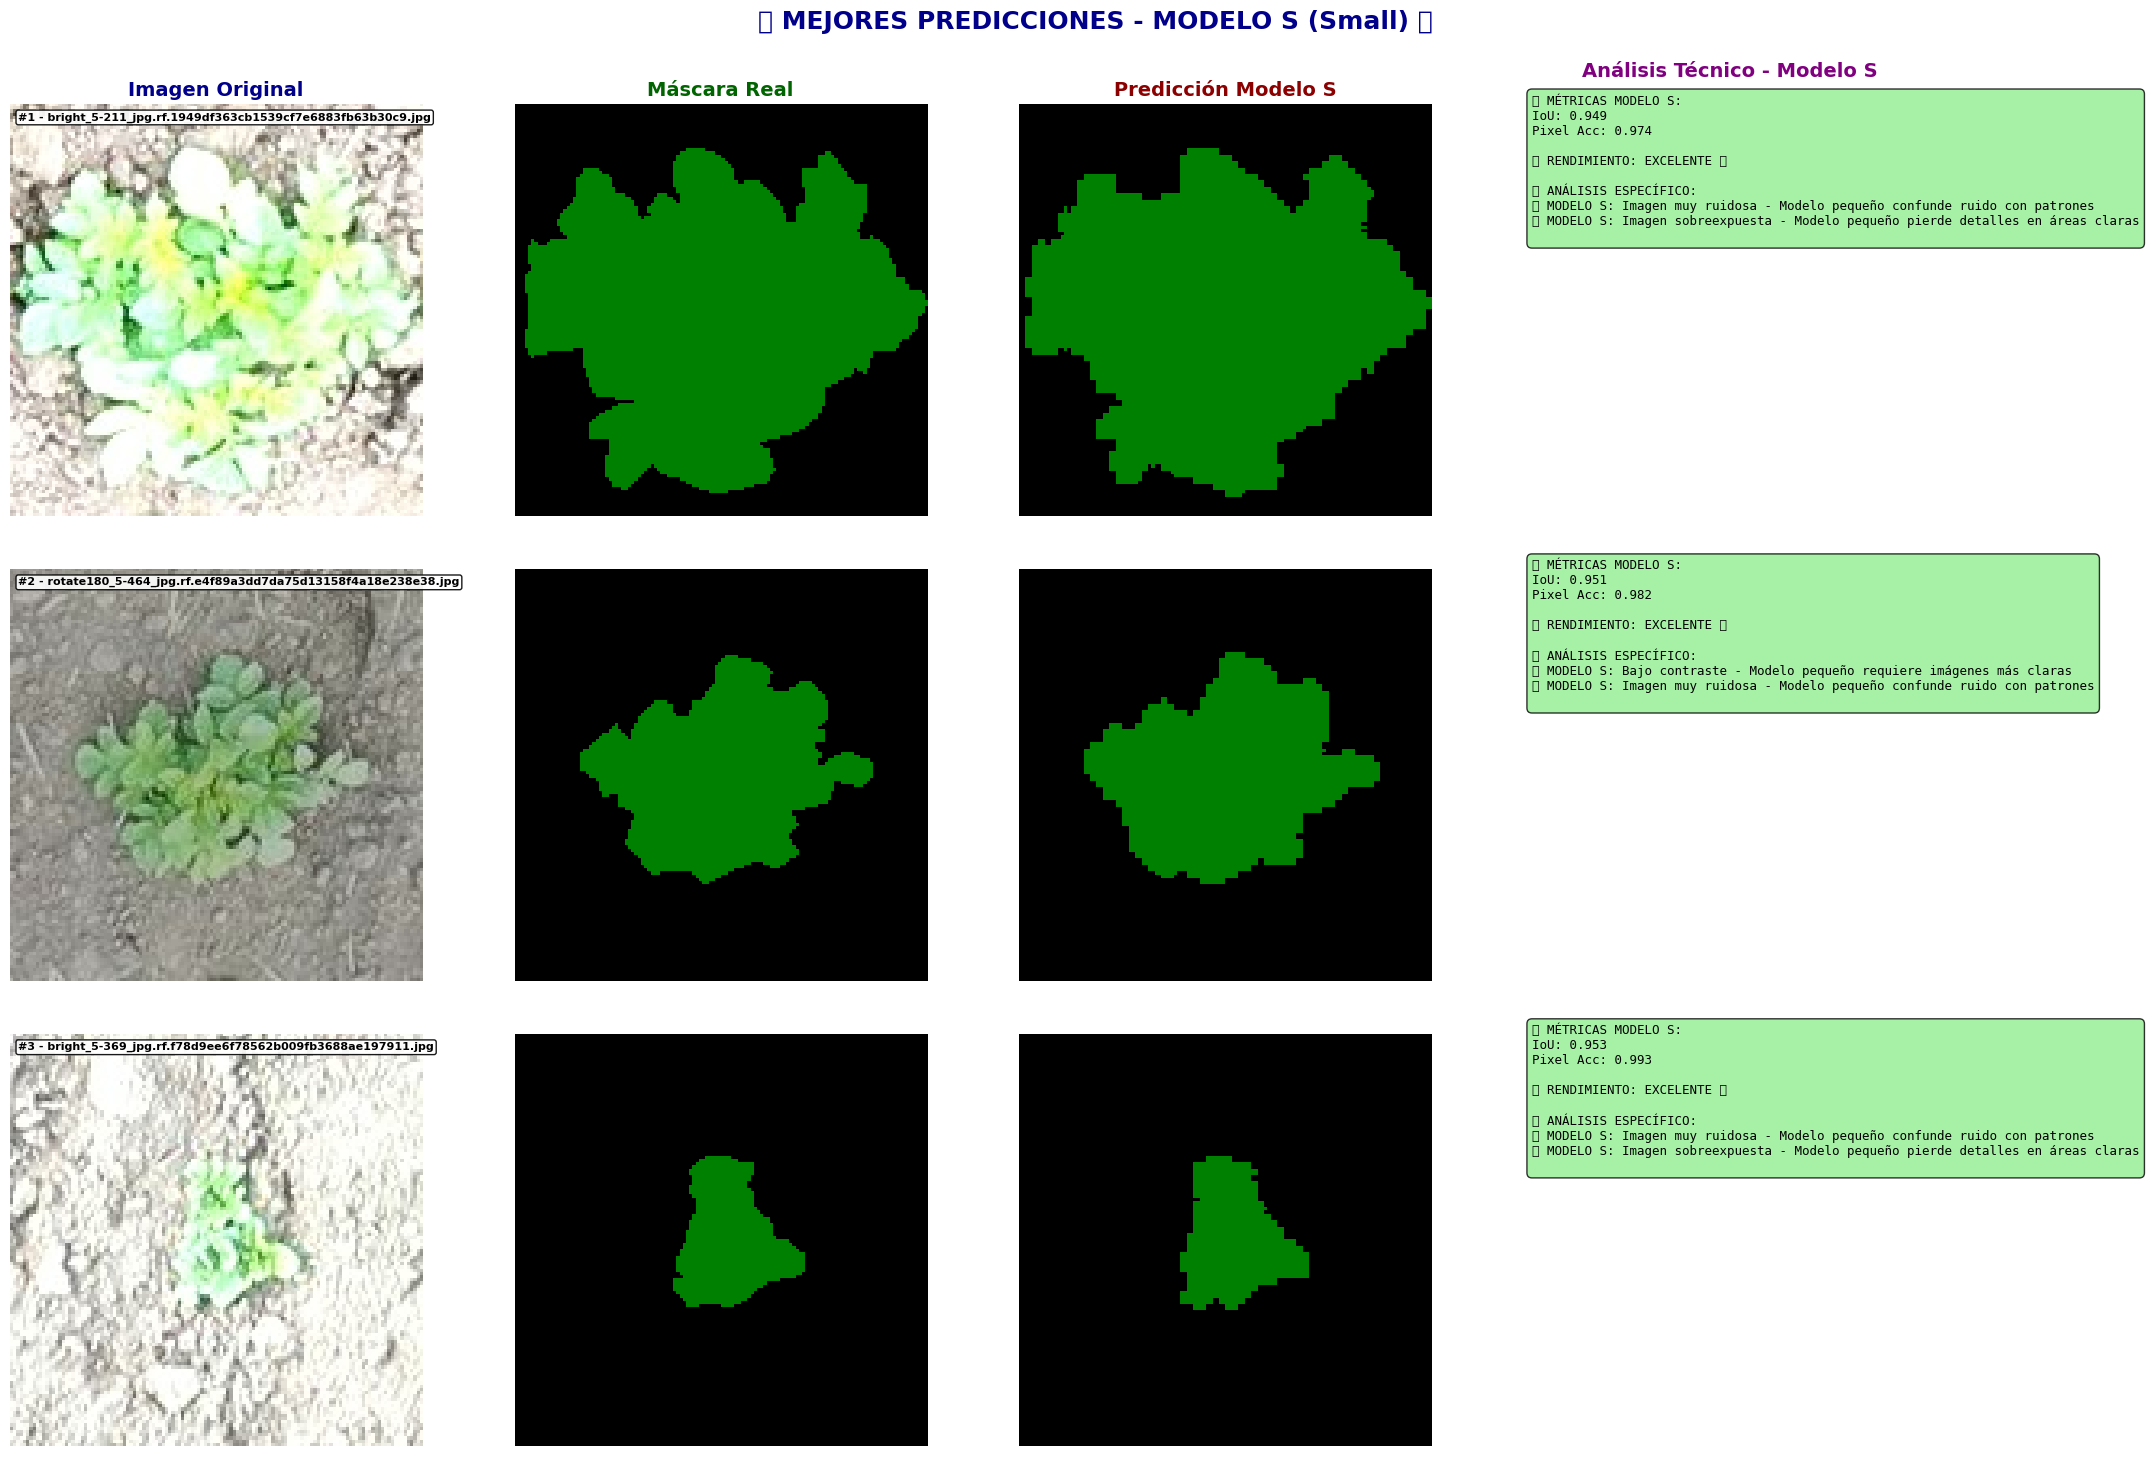

🎯 Generando visualización de PEORES predicciones Modelo S...


/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2886786960.py:325: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


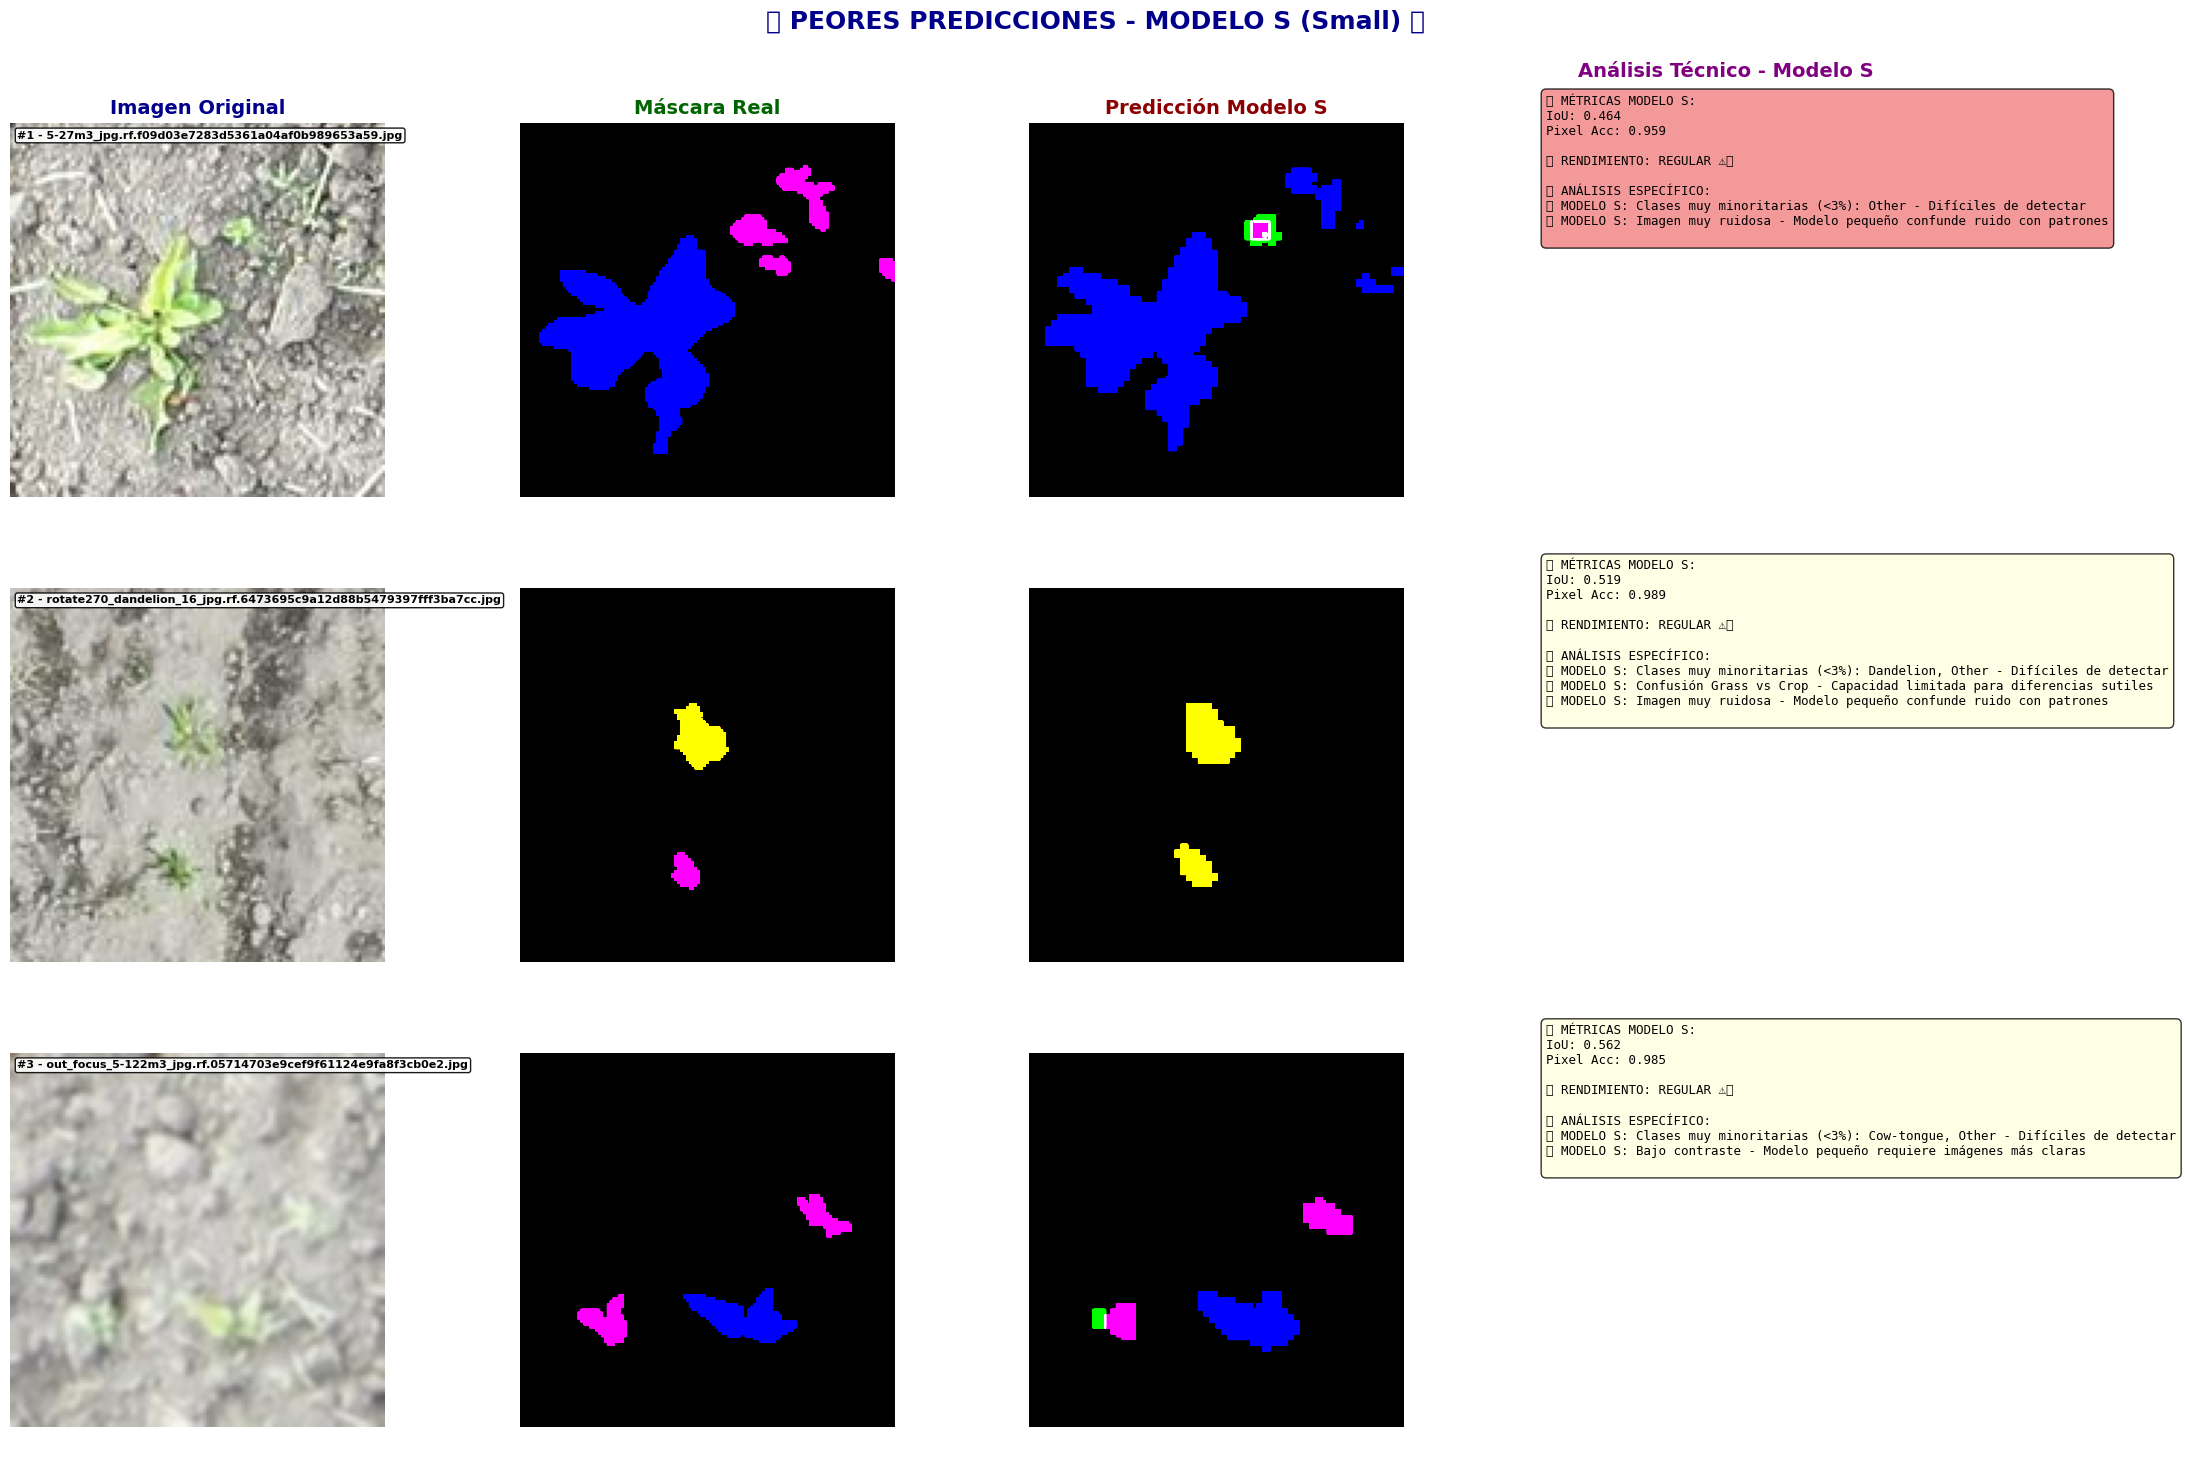


🎯 ANÁLISIS DE CLASES - MODELO S:
   📊 Background: IoU promedio = 0.962
   📊 Cow-tongue: IoU promedio = 0.883
   📊 Dandelion: IoU promedio = 0.946
   📊 Kikuyo: IoU promedio = 0.962
   📊 Other: IoU promedio = 0.742
   📊 Potato: IoU promedio = 0.882

🎯 CONCLUSIONES MODELO S:
   ❌ Clase más difícil: Other (IoU: 0.742)
   ✅ Clase mejor detectada: Kikuyo (IoU: 0.962)


In [12]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
from glob import glob
import random
from sklearn.metrics import accuracy_score, jaccard_score
import cv2
from scipy import ndimage

# --- 1. CONFIGURACIÓN MODELO S ---
MODEL_PATH = 'efficient_weed_model_S_best.keras'
BASE_PATH = './Balanced'
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 6
ANALYSIS_BATCH_SIZE = 50  # Cantidad de imágenes para análisis
TOP_BOTTOM_SAMPLES = 3   # Mejores y peores predicciones a mostrar

# Nombres de las clases para mejor interpretación
CLASS_NAMES = [
    "Background",
    "Cow-tongue",
    "Dandelion",
    "Kikuyo",
    "Other",
    "Potato"
]
CLASS_COLORS = [
    [0, 0, 0],      # Background - Negro
    [0, 0, 255],      # "Cow-tongue- Azul
    [255, 165, 0],  # Dandelion - Naranja
    [255, 255, 0],      # Kikuyo - Amarillo
    [128, 0, 128], # Other - Púrpura
    [0, 128, 0]   # Potato - Verde oscuro
]

# --- 2. DEFINICIONES DEL MODELO S ---
class ASPPModule(layers.Layer):
    def __init__(self, filters=192, **kwargs):
        super(ASPPModule, self).__init__(**kwargs)
        self.filters = filters
        self.conv_1x1 = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1 = layers.BatchNormalization()
        self.relu_1x1 = layers.ReLU()
        self.conv_3x3_6 = layers.Conv2D(filters, 3, padding='same', dilation_rate=6, use_bias=False)
        self.bn_3x3_6 = layers.BatchNormalization()
        self.relu_3x3_6 = layers.ReLU()
        self.conv_3x3_12 = layers.Conv2D(filters, 3, padding='same', dilation_rate=12, use_bias=False)
        self.bn_3x3_12 = layers.BatchNormalization()
        self.relu_3x3_12 = layers.ReLU()
        self.conv_3x3_18 = layers.Conv2D(filters, 3, padding='same', dilation_rate=18, use_bias=False)
        self.bn_3x3_18 = layers.BatchNormalization()
        self.relu_3x3_18 = layers.ReLU()
        self.global_avg_pool = layers.GlobalAveragePooling2D(keepdims=True)
        self.conv_1x1_gap = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1_gap = layers.BatchNormalization()
        self.relu_1x1_gap = layers.ReLU()
        self.conv_final = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_final = layers.BatchNormalization()
        self.relu_final = layers.ReLU()
        self.dropout = layers.Dropout(0.2)
    def call(self, inputs, training=None):
        input_shape = tf.shape(inputs)
        conv_1x1 = self.relu_1x1(self.bn_1x1(self.conv_1x1(inputs), training=training))
        conv_3x3_6 = self.relu_3x3_6(self.bn_3x3_6(self.conv_3x3_6(inputs), training=training))
        conv_3x3_12 = self.relu_3x3_12(self.bn_3x3_12(self.conv_3x3_12(inputs), training=training))
        conv_3x3_18 = self.relu_3x3_18(self.bn_3x3_18(self.conv_3x3_18(inputs), training=training))
        gap = self.global_avg_pool(inputs)
        gap = self.relu_1x1_gap(self.bn_1x1_gap(self.conv_1x1_gap(gap), training=training))
        gap = tf.image.resize(gap, [input_shape[1], input_shape[2]], method='bilinear')
        concat = layers.Concatenate()([conv_1x1, conv_3x3_6, conv_3x3_12, conv_3x3_18, gap])
        output = self.relu_final(self.bn_final(self.conv_final(concat), training=training))
        output = self.dropout(output, training=training)
        return output

class DeformableAttention(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(DeformableAttention, self).__init__(**kwargs)
        self.filters = filters
    def build(self, input_shape):
        self.attention_conv = layers.Conv2D(self.filters, 1, padding='same', activation='sigmoid', name='attention_weights_conv', use_bias=False)
        self.bn_attention = layers.BatchNormalization()
        self.feature_conv = layers.SeparableConv2D(self.filters, 3, padding='same', name='feature_processing_conv', use_bias=False)
        self.bn_feature = layers.BatchNormalization()
        self.relu_feature = layers.ReLU()
        super(DeformableAttention, self).build(input_shape)
    def call(self, inputs, training=None):
        attention_weights = self.bn_attention(self.attention_conv(inputs), training=training)
        features = self.relu_feature(self.bn_feature(self.feature_conv(inputs), training=training))
        attended_features = features * attention_weights
        return attended_features

# Funciones dummy para cargar el modelo S
def dice_coefficient(y_true, y_pred, smooth=1e-6): return 0.0
def iou_metric(y_true, y_pred): return 0.0
def combined_loss(y_true, y_pred): return 0.0
def dice_loss(y_true, y_pred): return 0.0

# --- 3. MÉTRICAS DE EVALUACIÓN ---
def calculate_iou_per_image(y_true, y_pred):
    """Calcula IoU promedio por imagen"""
    y_true_flat = np.argmax(y_true, axis=-1).flatten()
    y_pred_flat = np.argmax(y_pred, axis=-1).flatten()

    if len(np.unique(y_true_flat)) == 1 and len(np.unique(y_pred_flat)) == 1:
        return 1.0 if y_true_flat[0] == y_pred_flat[0] else 0.0

    return jaccard_score(y_true_flat, y_pred_flat, average='macro', zero_division=0)

def calculate_pixel_accuracy(y_true, y_pred):
    """Calcula accuracy a nivel de pixel"""
    y_true_flat = np.argmax(y_true, axis=-1).flatten()
    y_pred_flat = np.argmax(y_pred, axis=-1).flatten()
    return accuracy_score(y_true_flat, y_pred_flat)

def calculate_class_wise_iou(y_true, y_pred):
    """Calcula IoU por clase"""
    y_true_indices = np.argmax(y_true, axis=-1).flatten()
    y_pred_indices = np.argmax(y_pred, axis=-1).flatten()

    class_ious = {}
    for class_id in range(NUM_CLASSES):
        true_mask = (y_true_indices == class_id)
        pred_mask = (y_pred_indices == class_id)

        intersection = np.logical_and(true_mask, pred_mask).sum()
        union = np.logical_or(true_mask, pred_mask).sum()

        if union == 0:
            class_ious[CLASS_NAMES[class_id]] = 1.0 if intersection == 0 else 0.0
        else:
            class_ious[CLASS_NAMES[class_id]] = intersection / union

    return class_ious

# --- 4. ANÁLISIS DE PROBLEMAS ESPECÍFICOS PARA MODELO S ---
def analyze_prediction_issues(image, y_true, y_pred, image_path):
    """Analiza técnicamente por qué una predicción podría ser mala - Optimizado para Modelo S"""
    issues = []

    # Convertir a índices de clase
    true_mask = np.argmax(y_true, axis=-1)
    pred_mask = np.argmax(y_pred, axis=-1)

    # 1. ANÁLISIS ESPECÍFICO PARA MODELO S (Small)
    # Los modelos pequeños tienen limitaciones específicas

    # Análisis de complejidad de la escena
    unique_classes_true = len(np.unique(true_mask))
    if unique_classes_true > 4:
        issues.append("🔬 MODELO S: Escena muy compleja (>4 clases) - Limitación de capacidad")

    # 2. Análisis de bordes y transiciones (crítico para modelos pequeños)
    true_edges = cv2.Canny(true_mask.astype(np.uint8) * 40, 50, 150)
    edge_pixels = np.sum(true_edges > 0)
    edge_density = edge_pixels / (IMG_HEIGHT * IMG_WIDTH)

    if edge_density > 0.25:
        issues.append("🔬 MODELO S: Alta densidad de bordes - Modelo pequeño con limitada resolución de detalles")
    elif edge_density > 0.15:
        issues.append("🔬 MODELO S: Bordes moderados - Cerca del límite de capacidad del modelo")

    # 3. Análisis de fragmentación (especialmente problemático para modelos S)
    num_true_objects = 0
    for class_id in range(1, NUM_CLASSES):
        class_mask = (true_mask == class_id).astype(np.uint8)
        if np.sum(class_mask) > 0:
            _, labels = cv2.connectedComponents(class_mask)
            num_objects = len(np.unique(labels)) - 1
            num_true_objects += num_objects

    if num_true_objects > 8:
        issues.append("🔬 MODELO S: Fragmentación extrema - Modelo pequeño lucha con múltiples objetos")
    elif num_true_objects > 5:
        issues.append("🔬 MODELO S: Fragmentación moderada - Desafío para la capacidad limitada")

    # 4. Análisis de clases minoritarias (crítico para modelo S)
    class_distributions = []
    for class_id in range(NUM_CLASSES):
        class_pixels = np.sum(true_mask == class_id)
        class_percentage = class_pixels / (IMG_HEIGHT * IMG_WIDTH) * 100
        class_distributions.append((CLASS_NAMES[class_id], class_percentage))

    minority_classes = [name for name, perc in class_distributions if 0 < perc < 3]
    if len(minority_classes) > 0:
        issues.append(f"🔬 MODELO S: Clases muy minoritarias (<3%): {', '.join(minority_classes)} - Difíciles de detectar")

    # 5. Análisis específico de confusión para modelo S
    confusion_pairs = [
        (1, 3, "Broadleaf vs Small_broadleaf"),  # Más crítico para modelo S
        (2, 4, "Grass vs Crop"),
        (0, 5, "Background vs Soil"),
    ]

    for class1, class2, pair_name in confusion_pairs:
        true_class1 = np.sum(true_mask == class1)
        pred_class1_as_class2 = np.sum((true_mask == class1) & (pred_mask == class2))
        pred_class2_as_class1 = np.sum((true_mask == class2) & (pred_mask == class1))

        if true_class1 > 0:
            confusion_rate = (pred_class1_as_class2 + pred_class2_as_class1) / true_class1
            if confusion_rate > 0.2:  # Umbral más bajo para modelo S
                issues.append(f"🔬 MODELO S: Confusión {pair_name} - Capacidad limitada para diferencias sutiles")

    # 6. Análisis de calidad de imagen (más crítico para modelo S)
    image_gray = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Contraste (más sensible para modelo S)
    contrast = np.std(image_gray)
    if contrast < 25:
        issues.append("🔬 MODELO S: Bajo contraste - Modelo pequeño requiere imágenes más claras")

    # Análisis de ruido
    laplacian_var = cv2.Laplacian(image_gray, cv2.CV_64F).var()
    if laplacian_var < 80:
        issues.append("🔬 MODELO S: Imagen borrosa - Modelo pequeño pierde detalles importantes")
    elif laplacian_var > 500:
        issues.append("🔬 MODELO S: Imagen muy ruidosa - Modelo pequeño confunde ruido con patrones")

    # 7. Análisis de iluminación (crítico para modelo S)
    mean_brightness = np.mean(image_gray)
    brightness_std = np.std(image_gray)

    if mean_brightness < 60:
        issues.append("🔬 MODELO S: Imagen muy oscura - Modelo pequeño pierde información en sombras")
    elif mean_brightness > 190:
        issues.append("🔬 MODELO S: Imagen sobreexpuesta - Modelo pequeño pierde detalles en áreas claras")

    if brightness_std < 20:
        issues.append("🔬 MODELO S: Iluminación muy uniforme - Puede reducir contraste de características")
    elif brightness_std > 60:
        issues.append("🔬 MODELO S: Iluminación muy variable - Modelo pequeño lucha con cambios abruptos")

    # 8. Análisis específico de rendimiento del modelo S
    prediction_confidence = np.max(y_pred, axis=-1)
    low_confidence_pixels = np.sum(prediction_confidence < 0.7) / (IMG_HEIGHT * IMG_WIDTH)

    if low_confidence_pixels > 0.4:
        issues.append("🔬 MODELO S: Baja confianza en predicciones - Indicativo de limitaciones del modelo")

    if len(issues) == 0:
        issues.append("✅ MODELO S: No se detectaron problemas técnicos evidentes - Caso favorable")

    return issues

# --- 5. VISUALIZACIÓN ESPECÍFICA PARA MODELO S ---
def plot_detailed_comparison_S(images, true_masks, pred_masks, scores, image_paths, issues_list, title):
    """Visualiza comparación detallada específica para Modelo S"""
    custom_cmap = ListedColormap(CLASS_COLORS)
    num_samples = len(images)

    fig, axes = plt.subplots(num_samples, 4, figsize=(22, num_samples * 5))
    if num_samples == 1:
        axes = np.expand_dims(axes, axis=0)

    # Títulos específicos para Modelo S
    axes[0, 0].set_title("Imagen Original", fontsize=14, fontweight='bold', color='darkblue')
    axes[0, 1].set_title("Máscara Real", fontsize=14, fontweight='bold', color='darkgreen')
    axes[0, 2].set_title("Predicción Modelo S", fontsize=14, fontweight='bold', color='darkred')
    axes[0, 3].set_title("Análisis Técnico - Modelo S", fontsize=14, fontweight='bold', color='purple')

    for i in range(num_samples):
        # Imagen original
        axes[i, 0].imshow(images[i].astype('uint8'))
        axes[i, 0].axis('off')

        # Máscara real
        true_indices = np.argmax(true_masks[i], axis=-1)
        axes[i, 1].imshow(true_indices, cmap=custom_cmap, vmin=0, vmax=NUM_CLASSES-1)
        axes[i, 1].axis('off')

        # Predicción
        pred_indices = np.argmax(pred_masks[i], axis=-1)
        axes[i, 2].imshow(pred_indices, cmap=custom_cmap, vmin=0, vmax=NUM_CLASSES-1)
        axes[i, 2].axis('off')

        # Análisis técnico específico para Modelo S
        axes[i, 3].axis('off')

        iou_score = scores[i]['iou']
        pixel_acc = scores[i]['pixel_accuracy']

        analysis_text = f"🎯 MÉTRICAS MODELO S:\n"
        analysis_text += f"IoU: {iou_score:.3f}\n"
        analysis_text += f"Pixel Acc: {pixel_acc:.3f}\n\n"

        # Clasificar el rendimiento
        if iou_score > 0.8:
            analysis_text += "📊 RENDIMIENTO: EXCELENTE ✅\n\n"
        elif iou_score > 0.6:
            analysis_text += "📊 RENDIMIENTO: BUENO 👍\n\n"
        elif iou_score > 0.4:
            analysis_text += "📊 RENDIMIENTO: REGULAR ⚠️\n\n"
        else:
            analysis_text += "📊 RENDIMIENTO: POBRE ❌\n\n"

        analysis_text += "🔍 ANÁLISIS ESPECÍFICO:\n"

        for j, issue in enumerate(issues_list[i][:4]):
            analysis_text += f"{issue}\n"

        # Color de fondo basado en rendimiento
        if iou_score > 0.7:
            bg_color = "lightgreen"
        elif iou_score > 0.5:
            bg_color = "lightyellow"
        else:
            bg_color = "lightcoral"

        axes[i, 3].text(0.02, 0.98, analysis_text, transform=axes[i, 3].transAxes,
                       fontsize=9, verticalalignment='top', fontfamily='monospace',
                       bbox=dict(boxstyle="round,pad=0.4", facecolor=bg_color, alpha=0.8))

        # Agregar nombre del archivo y ranking
        filename = os.path.basename(image_paths[i])
        rank_text = f"#{i+1} - {filename}"
        axes[i, 0].text(0.02, 0.98, rank_text, transform=axes[i, 0].transAxes,
                       fontsize=8, verticalalignment='top', fontweight='bold',
                       bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.9))

    plt.suptitle(f"{title} - MODELO S (Small) 🔬", fontsize=18, fontweight='bold', color='darkblue')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

# --- 6. FUNCIÓN PRINCIPAL DE ANÁLISIS PARA MODELO S ---
def analyze_model_S():
    """Analiza específicamente el modelo S con optimizaciones particulares"""
    print(f"\n{'='*80}")
    print(f"🔬 ANÁLISIS ESPECIALIZADO - MODELO S (Small)")
    print(f"{'='*80}")

    # Cargar modelo S
    custom_objects = {
        'ASPPModule': ASPPModule,
        'DeformableAttention': DeformableAttention,
        'combined_loss': combined_loss,
        'dice_coefficient': dice_coefficient,
        'iou_metric': iou_metric,
        'dice_loss': dice_loss
    }

    try:
        model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)
        print("✅ Modelo S cargado exitosamente.")

        # Información específica del modelo
        total_params = model.count_params()
        print(f"📊 Parámetros del Modelo S: {total_params:,}")
        print(f"📊 Tipo de modelo: Small (Optimizado para eficiencia)")

    except Exception as e:
        print(f"❌ Error cargando modelo S: {e}")
        return []

    # Cargar datos de test
    test_images_path = os.path.join(BASE_PATH, 'test/images')
    test_masks_path = os.path.join(BASE_PATH, 'test/masks')
    test_image_paths = sorted(glob(os.path.join(test_images_path, '*.jpg')))
    test_mask_paths = sorted(glob(os.path.join(test_masks_path, '*.png')))

    if not test_image_paths:
        print("❌ No se encontraron imágenes de test.")
        return []

    # Seleccionar muestra estratificada para modelo S
    paired_paths = list(zip(test_image_paths, test_mask_paths))
    random.seed(42)  # Para reproducibilidad
    random.shuffle(paired_paths)
    sample_paths = paired_paths[:ANALYSIS_BATCH_SIZE]

    print(f"📊 Analizando {len(sample_paths)} imágenes con Modelo S...")
    print(f"💡 Nota: Análisis optimizado para detectar limitaciones de modelos pequeños")

    results = []

    for idx, (img_path, mask_path) in enumerate(sample_paths):
        if idx % 10 == 0:
            print(f"   Procesando imagen {idx+1}/{len(sample_paths)}...")

        # Cargar y preprocesar (igual que en tu código original)
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3, expand_animations=False)
        image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])

        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)
        mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
        mask = tf.one_hot(tf.squeeze(tf.cast(mask, tf.int32)), NUM_CLASSES)

        image_for_model = tf.keras.applications.efficientnet_v2.preprocess_input(
            tf.cast(image, tf.float32)
        )

        # Predicción
        pred = model.predict(tf.expand_dims(image_for_model, 0), verbose=0)[0]

        # Calcular métricas
        iou_score = calculate_iou_per_image(mask.numpy(), pred)
        pixel_acc = calculate_pixel_accuracy(mask.numpy(), pred)
        class_wise_iou = calculate_class_wise_iou(mask.numpy(), pred)

        # Analizar problemas específicos para modelo S
        issues = analyze_prediction_issues(image.numpy(), mask.numpy(), pred, img_path)

        results.append({
            'image_path': img_path,
            'image': image.numpy(),
            'true_mask': mask.numpy(),
            'pred_mask': pred,
            'iou': iou_score,
            'pixel_accuracy': pixel_acc,
            'class_wise_iou': class_wise_iou,
            'issues': issues
        })

    # Ordenar por IoU
    results.sort(key=lambda x: x['iou'])

    # Estadísticas específicas para Modelo S
    print(f"\n📈 ESTADÍSTICAS MODELO S:")
    ious = [r['iou'] for r in results]
    pixel_accs = [r['pixel_accuracy'] for r in results]
    print(f"   📊 IoU - Promedio: {np.mean(ious):.4f} ± {np.std(ious):.4f}")
    print(f"   📊 Pixel Accuracy - Promedio: {np.mean(pixel_accs):.4f} ± {np.std(pixel_accs):.4f}")
    print(f"   📊 Mejor IoU: {np.max(ious):.4f}")
    print(f"   📊 Peor IoU: {np.min(ious):.4f}")
    print(f"   📊 Mediana IoU: {np.median(ious):.4f}")

    # Análisis de distribución de rendimiento
    excellent_count = sum(1 for iou in ious if iou > 0.8)
    good_count = sum(1 for iou in ious if 0.6 < iou <= 0.8)
    regular_count = sum(1 for iou in ious if 0.4 < iou <= 0.6)
    poor_count = sum(1 for iou in ious if iou <= 0.4)

    print(f"\n📊 DISTRIBUCIÓN DE RENDIMIENTO MODELO S:")
    print(f"   ✅ Excelente (IoU > 0.8): {excellent_count} imágenes ({excellent_count/len(ious)*100:.1f}%)")
    print(f"   👍 Bueno (0.6 < IoU ≤ 0.8): {good_count} imágenes ({good_count/len(ious)*100:.1f}%)")
    print(f"   ⚠️  Regular (0.4 < IoU ≤ 0.6): {regular_count} imágenes ({regular_count/len(ious)*100:.1f}%)")
    print(f"   ❌ Pobre (IoU ≤ 0.4): {poor_count} imágenes ({poor_count/len(ious)*100:.1f}%)")

    # Visualizar mejores predicciones
    print(f"\n🎯 Generando visualización de MEJORES predicciones Modelo S...")
    best_results = results[-TOP_BOTTOM_SAMPLES:]
    best_images = [r['image'] for r in best_results]
    best_true_masks = [r['true_mask'] for r in best_results]
    best_pred_masks = [r['pred_mask'] for r in best_results]
    best_scores = [{'iou': r['iou'], 'pixel_accuracy': r['pixel_accuracy']} for r in best_results]
    best_paths = [r['image_path'] for r in best_results]
    best_issues = [r['issues'] for r in best_results]

    plot_detailed_comparison_S(
        best_images, best_true_masks, best_pred_masks,
        best_scores, best_paths, best_issues,
        "🏆 MEJORES PREDICCIONES"
    )

    # Visualizar peores predicciones
    print(f"🎯 Generando visualización de PEORES predicciones Modelo S...")
    worst_results = results[:TOP_BOTTOM_SAMPLES]
    worst_images = [r['image'] for r in worst_results]
    worst_true_masks = [r['true_mask'] for r in worst_results]
    worst_pred_masks = [r['pred_mask'] for r in worst_results]
    worst_scores = [{'iou': r['iou'], 'pixel_accuracy': r['pixel_accuracy']} for r in worst_results]
    worst_paths = [r['image_path'] for r in worst_results]
    worst_issues = [r['issues'] for r in worst_results]

    plot_detailed_comparison_S(
        worst_images, worst_true_masks, worst_pred_masks,
        worst_scores, worst_paths, worst_issues,
        "📉 PEORES PREDICCIONES"
    )

    # Análisis de clases más problemáticas para Modelo S
    print(f"\n🎯 ANÁLISIS DE CLASES - MODELO S:")
    class_performance = {}
    for class_name in CLASS_NAMES:
        class_ious = []
        for result in results:
            if class_name in result['class_wise_iou']:
                class_ious.append(result['class_wise_iou'][class_name])
        if class_ious:
            avg_iou = np.mean(class_ious)
            class_performance[class_name] = avg_iou
            print(f"   📊 {class_name}: IoU promedio = {avg_iou:.3f}")

    # Identificar clase más difícil para Modelo S
    if class_performance:
        worst_class = min(class_performance, key=class_performance.get)
        best_class = max(class_performance, key=class_performance.get)
        print(f"\n🎯 CONCLUSIONES MODELO S:")
        print(f"   ❌ Clase más difícil: {worst_class} (IoU: {class_performance[worst_class]:.3f})")
        print(f"   ✅ Clase mejor detectada: {best_class} (IoU: {class_performance[best_class]:.3f})")

    return results

# --- 7. FUNCIÓN PARA CARGAR Y PREPROCESAR (Igual que tu código original) ---
def load_and_preprocess_for_visualization(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])

    mask = tf.io.read_file(mask_path)

if __name__ == "__main__":
    results = analyze_model_S()



In [ ]:
# Paso 1: Descomprimir el dataset (esto solo se hace una vez)
import os
import zipfile

zip_path = '/content/Balanced.zip'
extract_path = '/content/'

# Solo descomprimir si no se ha hecho antes
if not os.path.exists(os.path.join(extract_path, 'Balanced')):
    print(f"Descomprimiendo {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("¡Descompresión completada!")
else:
    print("La carpeta 'Balanced' ya existe. Omitiendo descompresión.")

Descomprimiendo /content/Balanced.zip...
¡Descompresión completada!
